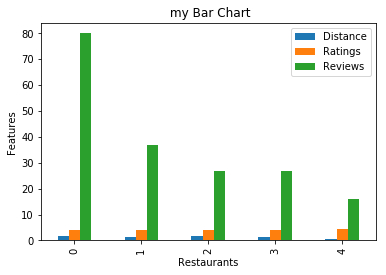

In [2]:
import pandas as pd
from pandas import Series
from matplotlib import pyplot

column_headings = ['ID', 'Card', 'Distance', 'Name', 'Price','Ratings','Reviews','Saturday','Sunday']
dataframe = pd.read_csv('yelp-data-all.csv', names = column_headings, skiprows=[0])

selected = dataframe[(dataframe.Reviews>4) & 
             (dataframe.Card=='Yes') & 
             (dataframe.Saturday!='Closed') & 
             (dataframe.Saturday!='Empty') & 
             (dataframe.Sunday!='Closed') & 
             (dataframe.Sunday!='Empty')]

top_10_by_distance = selected.sort_values('Distance', ascending = True).head(10)
top_10_by_ratings = selected.sort_values('Ratings', ascending = False).head(10)
top_10_by_reviews = selected.sort_values('Reviews', ascending = False).head(10)

first_filter = pd.merge(top_10_by_reviews, top_10_by_ratings, on=['ID', 'Card', 'Distance', 'Name', 'Price', 'Ratings','Reviews','Saturday','Sunday'], how='inner')
second_filter = pd.merge(top_10_by_reviews, top_10_by_distance, on=['ID', 'Card', 'Distance', 'Name', 'Price', 'Ratings','Reviews','Saturday','Sunday'], how='inner')
top_five = pd.merge(first_filter, second_filter, on=['ID', 'Card', 'Distance', 'Name', 'Price', 'Ratings','Reviews','Saturday','Sunday'], how='inner')

visual_data = top_five.filter(items=['Distance', 'Ratings','Reviews'])
visual_data.plot(kind = 'bar')
pyplot.title(' my Bar Chart')
pyplot.xlabel('Restaurants')
pyplot.ylabel('Features')
pyplot.show()


In [3]:
top_five

,ID,Card,Distance,Name,Price,Ratings,Reviews,Saturday,Sunday
0,5,Yes,1.6,Karl Fazer Café,€13-21,4.0,80,9:00 am - 10:00 pm,10:00 am - 6:00 pm
1,4,Yes,1.4,La Torrefazione,€13-21,4.0,37,9:00 am - 7:00 pm,10:00 am - 6:30 pm
2,2,Yes,1.9,Café Engel,€13-21,4.0,27,9:00 am - 9:00 pm,10:00 am - 7:00 pm
3,6,Yes,1.5,Tin Tin Tango,€13-21,4.0,27,9:00 am - 12:00 am,10:00 am - 9:00 pm
4,1,Yes,0.6,SIS. Deli & Cafe,€13-21,4.5,16,9:00 am - 4:00 pm,9:00 am - 4:00 pm


In [4]:
visual_data

,Distance,Ratings,Reviews
0,1.6,4.0,80
1,1.4,4.0,37
2,1.9,4.0,27
3,1.5,4.0,27
4,0.6,4.5,16


In [5]:
top_10_by_distance

,ID,Card,Distance,Name,Price,Ratings,Reviews,Saturday,Sunday
1,1,Yes,0.6,SIS. Deli & Cafe,€13-21,4.5,16,9:00 am - 4:00 pm,9:00 am - 4:00 pm
9,9,Yes,0.9,Deli Cafe Maya,Under €12,4.0,11,10:00 am - 4:00 pm,10:00 am - 4:00 pm
7,7,Yes,1.0,Cargo,€13-21,4.5,7,10:00 am - 10:00 pm,10:00 am - 4:00 pm
14,14,Yes,1.1,SIS. Deli & Cafe,€13-21,4.0,5,9:00 am - 4:00 pm,9:00 am - 4:00 pm
4,4,Yes,1.4,La Torrefazione,€13-21,4.0,37,9:00 am - 7:00 pm,10:00 am - 6:30 pm
6,6,Yes,1.5,Tin Tin Tango,€13-21,4.0,27,9:00 am - 12:00 am,10:00 am - 9:00 pm
15,15,Yes,1.5,Sandro,€13-21,4.0,12,10:00 am - 12:00 am,10:00 am - 11:00 pm
5,5,Yes,1.6,Karl Fazer Café,€13-21,4.0,80,9:00 am - 10:00 pm,10:00 am - 6:00 pm
16,16,Yes,1.8,Hima & Sali,Under €12,4.0,9,12:00 pm - 7:00 pm,12:00 pm - 7:00 pm
2,2,Yes,1.9,Café Engel,€13-21,4.0,27,9:00 am - 9:00 pm,10:00 am - 7:00 pm


In [6]:
top_10_by_ratings

,ID,Card,Distance,Name,Price,Ratings,Reviews,Saturday,Sunday
1,1,Yes,0.6,SIS. Deli & Cafe,€13-21,4.5,16,9:00 am - 4:00 pm,9:00 am - 4:00 pm
3,3,Yes,2.0,Café DaJa,€13-21,4.5,9,9:00 am - 6:00 pm,9:00 am - 6:00 pm
7,7,Yes,1.0,Cargo,€13-21,4.5,7,10:00 am - 10:00 pm,10:00 am - 4:00 pm
2,2,Yes,1.9,Café Engel,€13-21,4.0,27,9:00 am - 9:00 pm,10:00 am - 7:00 pm
4,4,Yes,1.4,La Torrefazione,€13-21,4.0,37,9:00 am - 7:00 pm,10:00 am - 6:30 pm
5,5,Yes,1.6,Karl Fazer Café,€13-21,4.0,80,9:00 am - 10:00 pm,10:00 am - 6:00 pm
6,6,Yes,1.5,Tin Tin Tango,€13-21,4.0,27,9:00 am - 12:00 am,10:00 am - 9:00 pm
9,9,Yes,0.9,Deli Cafe Maya,Under €12,4.0,11,10:00 am - 4:00 pm,10:00 am - 4:00 pm
10,10,Yes,2.6,Piritta,€13-21,4.0,17,9:00 am - 10:00 pm,9:00 am - 8:00 pm
13,13,Yes,3.3,Ursula,€13-21,4.0,27,9:00 am - 10:00 pm,9:00 am - 6:00 pm


In [7]:
top_10_by_reviews
    

,ID,Card,Distance,Name,Price,Ratings,Reviews,Saturday,Sunday
5,5,Yes,1.6,Karl Fazer Café,€13-21,4.0,80,9:00 am - 10:00 pm,10:00 am - 6:00 pm
4,4,Yes,1.4,La Torrefazione,€13-21,4.0,37,9:00 am - 7:00 pm,10:00 am - 6:30 pm
2,2,Yes,1.9,Café Engel,€13-21,4.0,27,9:00 am - 9:00 pm,10:00 am - 7:00 pm
6,6,Yes,1.5,Tin Tin Tango,€13-21,4.0,27,9:00 am - 12:00 am,10:00 am - 9:00 pm
13,13,Yes,3.3,Ursula,€13-21,4.0,27,9:00 am - 10:00 pm,9:00 am - 6:00 pm
18,18,Yes,2.0,Birgitta,€13-21,4.0,18,9:00 am - 10:00 pm,9:00 am - 10:00 pm
10,10,Yes,2.6,Piritta,€13-21,4.0,17,9:00 am - 10:00 pm,9:00 am - 8:00 pm
1,1,Yes,0.6,SIS. Deli & Cafe,€13-21,4.5,16,9:00 am - 4:00 pm,9:00 am - 4:00 pm
15,15,Yes,1.5,Sandro,€13-21,4.0,12,10:00 am - 12:00 am,10:00 am - 11:00 pm
17,17,Yes,7.5,Dylan,€13-21,4.0,12,11:30 am - 2:00 pm,11:30 am - 4:30 pm


In [8]:
first_filter

,ID,Card,Distance,Name,Price,Ratings,Reviews,Saturday,Sunday
0,5,Yes,1.6,Karl Fazer Café,€13-21,4.0,80,9:00 am - 10:00 pm,10:00 am - 6:00 pm
1,4,Yes,1.4,La Torrefazione,€13-21,4.0,37,9:00 am - 7:00 pm,10:00 am - 6:30 pm
2,2,Yes,1.9,Café Engel,€13-21,4.0,27,9:00 am - 9:00 pm,10:00 am - 7:00 pm
3,6,Yes,1.5,Tin Tin Tango,€13-21,4.0,27,9:00 am - 12:00 am,10:00 am - 9:00 pm
4,13,Yes,3.3,Ursula,€13-21,4.0,27,9:00 am - 10:00 pm,9:00 am - 6:00 pm
5,10,Yes,2.6,Piritta,€13-21,4.0,17,9:00 am - 10:00 pm,9:00 am - 8:00 pm
6,1,Yes,0.6,SIS. Deli & Cafe,€13-21,4.5,16,9:00 am - 4:00 pm,9:00 am - 4:00 pm


In [9]:
second_filter

,ID,Card,Distance,Name,Price,Ratings,Reviews,Saturday,Sunday
0,5,Yes,1.6,Karl Fazer Café,€13-21,4.0,80,9:00 am - 10:00 pm,10:00 am - 6:00 pm
1,4,Yes,1.4,La Torrefazione,€13-21,4.0,37,9:00 am - 7:00 pm,10:00 am - 6:30 pm
2,2,Yes,1.9,Café Engel,€13-21,4.0,27,9:00 am - 9:00 pm,10:00 am - 7:00 pm
3,6,Yes,1.5,Tin Tin Tango,€13-21,4.0,27,9:00 am - 12:00 am,10:00 am - 9:00 pm
4,1,Yes,0.6,SIS. Deli & Cafe,€13-21,4.5,16,9:00 am - 4:00 pm,9:00 am - 4:00 pm
5,15,Yes,1.5,Sandro,€13-21,4.0,12,10:00 am - 12:00 am,10:00 am - 11:00 pm
